# PyTorch

Creating a simple neural network using PyTorch. The network will take two-dimensional input data and classify it into one of four classes. We'll start by generating a synthetic dataset, then build and train our model, and finally evaluate its performance.

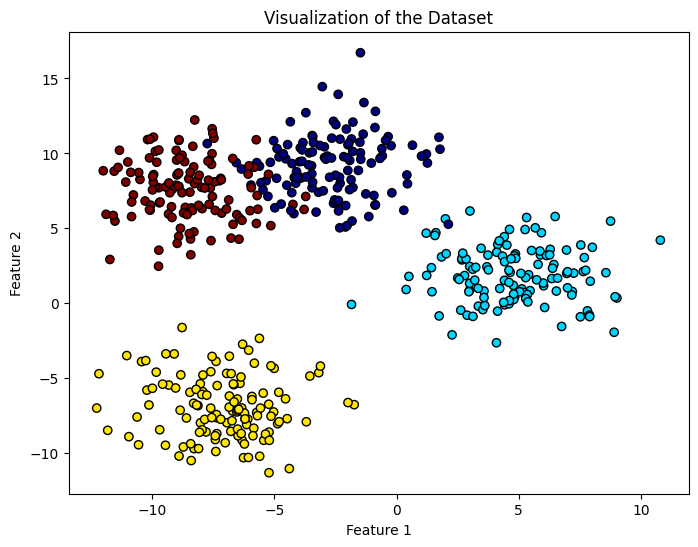

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# Generate a 2D dataset with 4 centers
X, y = make_blobs(n_samples=500, centers=4, n_features=2, cluster_std=2.0, random_state=42)
# separate out 20% of the data for testing
test_size = 0.2
test_size = int(test_size * X.shape[0])
X_train, X_test = X[:-test_size].copy(), X[-test_size:].copy()
y_train, y_test = y[:-test_size].copy(), y[-test_size:].copy()

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of the Dataset')
plt.show()


C:\Users\swoya\AppData\Local\Temp\ipykernel_29460\3105671579.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X_train, dtype=torch.float32)
C:\Users\swoya\AppData\Local\Temp\ipykernel_29460\3105671579.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y_train, dtype=torch.long)


Epoch 0, Cost: 12.593720436096191
Epoch 100, Cost: 0.17985859513282776
Epoch 200, Cost: 0.12545233964920044
Epoch 300, Cost: 0.11573758721351624
Epoch 400, Cost: 0.11132137477397919
Epoch 500, Cost: 0.10855165123939514
Epoch 600, Cost: 0.10654060542583466
Epoch 700, Cost: 0.10495755076408386
Epoch 800, Cost: 0.10364720970392227
Epoch 900, Cost: 0.10252558439970016


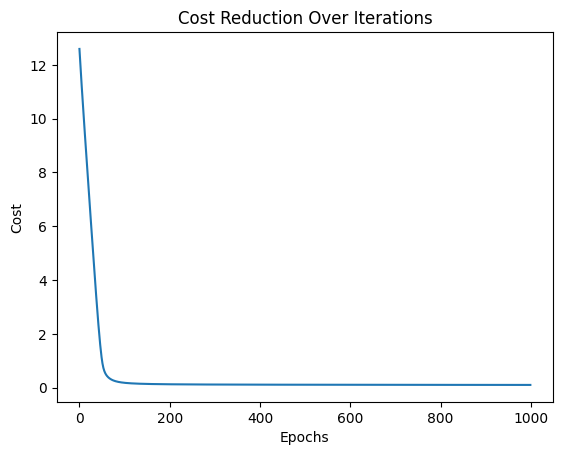

In [12]:
# Create a loop to train the model
# Collect the cost at each iteration
# Plot the cost to visualize the training process

import torch

X = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(y_train, dtype=torch.long)

# Initialize parameters
input_size = 2
output_size = 4
learning_rate = 0.01
epochs = 1000

W = torch.randn(input_size, output_size, requires_grad=True)
b = torch.zeros(output_size, requires_grad=True)

# Convert labels to one-hot encoding
Y = torch.zeros(y.size(0), output_size)
Y[torch.arange(y.size(0)), y] = 1

# Training the model
costs = []
for epoch in range(epochs):
    # Forward pass
    Z = X.mm(W) + b
    A = torch.softmax(Z, dim=1)

    # Compute cost (negative log likelihood loss)
    log_likelihood = -torch.sum(Y * torch.log(A)) / y.size(0)
    cost = log_likelihood
    costs.append(cost.item())

    # Backward pass
    cost.backward()

    # Update parameters
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

        W.grad.zero_()
        b.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Cost: {cost.item()}')

# Plotting the cost
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.show()

## Objective
Build and train a neural network with one hidden layer using PyTorch to classify a dataset with multiple classes. Implement the network without using high-level abstractions like `torch.nn` or `torch.optim`. Visualize the cost reduction over iterations to ensure that gradient descent is working effectively.

C:\Users\swoya\AppData\Local\Temp\ipykernel_29460\1546044803.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\swoya\AppData\Local\Temp\ipykernel_29460\1546044803.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
C:\Users\swoya\AppData\Local\Temp\ipykernel_29460\1546044803.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\swoya\AppData\Local\Temp\ipykernel_29460\1

Epoch 0, Cost:1.759657382965088
Epoch 100, Cost:1.337764024734497
Epoch 200, Cost:1.1452045440673828
Epoch 300, Cost:1.020443320274353
Epoch 400, Cost:0.9263291358947754
Epoch 500, Cost:0.8496387600898743
Epoch 600, Cost:0.7845278382301331
Epoch 700, Cost:0.7280396223068237
Epoch 800, Cost:0.6785253286361694
Epoch 900, Cost:0.6348697543144226


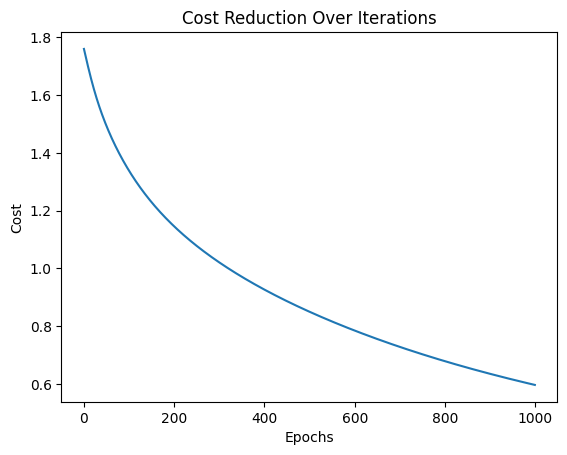

Training Accuracy: 94.50%
Testing Accuracy: 92.00%


In [15]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Initialize parameters
input_size = 2
hidden_size = 5
output_size = 4
learning_rate = 0.01
epochs = 1000

W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)
W2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

# Convert labels to one-hot encoding
Y = torch.zeros(y_train.size(0), output_size)
Y[torch.arange(y_train.size(0)), y_train] = 1

# Training the model
costs = []
for epoch in range(epochs):
    # Forward pass
    Z1 = X_train @ W1 + b1
    A1 = torch.sigmoid(Z1)  # Activation for the hidden layer
    Z2 = A1 @ W2 + b2
    A2 = torch.softmax(Z2, dim=1)  # Activation for the output layer

    # Compute cost (negative log likelihood loss)
    log_likelihood = -torch.log(A2[torch.arange(y_train.size(0)), y_train] + 1e-9)
    cost = torch.mean(log_likelihood)
    costs.append(cost.item())

    # Backward pass
    cost.backward()

    # Update parameters
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad

        # Zero the gradients after updating
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Cost:{cost.item()}')

# Plotting the cost, uncomment the following lines
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.show()



# Evaluate accuracy on the training set
Z1_train = X_train @ W1 + b1
A1_train = torch.sigmoid(Z1_train)
Z2_train = A1_train @ W2 + b2
A2_train = torch.softmax(Z2_train, dim=1)
predictions_train = torch.argmax(A2_train, dim=1)
accuracy_train = torch.mean((predictions_train == y_train).float())
print(f'Training Accuracy: {accuracy_train.item() * 100:.2f}%')


# Evaluate acccuracy on the test set
Z1_test = X_test @ W1 + b1
A1_test = torch.sigmoid(Z1_test)
Z2_test = A1_test @ W2 + b2
A2_test = torch.softmax(Z2_test, dim=1)
predictions_test = torch.argmax(A2_test, dim=1)
accuracy_test = torch.mean((predictions_test == y_test).float())
print(f'Testing Accuracy: {accuracy_test.item() * 100:.2f}%')
